In [95]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
from scipy import linalg
from sklearn.utils import extmath
from scipy.sparse.linalg import svds
from scipy.sparse import random as spr

# Matrix multuplication

In [2]:
#this method is used for calculate the optimal probability set in the randomized matrix multiplication algorithm.
def max_fnorm(A,B):
    fnorms=np.zeros(A.shape[1])
    nsum=0
    for i in range(A.shape[1]):
        fnorm=np.linalg.norm(A[:,i]) * np.linalg.norm(B[i,:])
        fnorms[i]=fnorm
        nsum=nsum+fnorm
    return fnorms/nsum

In [3]:
#random matrix multiplication method
def rand_matrix_mul(A,B,c,probability):
    col=np.array(range(A.shape[1]))
    msum=np.zeros([A.shape[0],B.shape[1]])
    for i in range(c):
        j=np.random.choice(col,p=probability)
        Aj=np.reshape(A[:,j],[len(A[:,j]),1])
        Bj=np.reshape(B[j,:],[1,len(B[j,:])])
        mul=np.matmul(Aj,Bj)/(c*p[j])
        msum=msum+mul
    return msum

In [17]:
#Create the list to store the result, each size of n (A' column number and B's row number) has one 
#element in the list. rmm for randomized matrix multiplication and emm for exact matrix multiplication.
#p_time for the time used to get the probability
rmm_time = [None]*10
rmm_accu = [None]*10
emm_time = [None]*10
emm_norm = [None]*10
p_time = [None]*10

#For each calculation, we want to repeat 30 times and take average to get a more accurate description 
#of the method
repeat_times = 40
#Create the array of different sampling sizes.
C = np.array(range(50,501,50))
#set initial value for n
init_n = 30000

In [18]:
#Doing the test for the first 5 sizes
for i in range(5):
    #set size of A,B, and the arrays to store the time and accuracy for different sizes of A and B.
    A = np.random.rand(700,init_n+i*30000) #elements of A is in [0,1)
    B = np.random.rand(init_n+i*30000,700) #elements of B is in [0,1)
    times=np.zeros(len(C)) #same n, different c
    errors=np.zeros(len(C)) #same n, different c

    #calculate the exact matrix multiplication
    start=time.time()
    exact=np.matmul(A,B)
    end=time.time()
    emm_time[i] = end-start
    extfnorm=np.linalg.norm(exact)
    emm_norm[i] = extfnorm*extfnorm

    #get the probability
    start = time.time()
    p=max_fnorm(A,B)
    end = time.time()
    p_time[i] = end-start
    
    #calculate the random matrix multiplication for each value of n (taking the average)
    index=0
    for c in C:
        timS = np.zeros(repeat_times) #same n, same c, for average
        errS = np.zeros(repeat_times) #same n, same c, for average
        for k in range(repeat_times):
            start=time.time()
            random=rand_matrix_mul(A,B,c,p)
            end=time.time()
            error=np.linalg.norm(exact-random)
            timS[k] = end-start
            errS[k] = error*error/(extfnorm*extfnorm)
        times[index]=np.average(timS)
        errors[index]=np.average(errS)
        index+=1
        
    #adding the result to the rmm_time and rmm_accu
    rmm_time[i] = times
    rmm_accu[i] = errors

In [24]:
#Doing the test for the next 5 sizes
for i in range(5,10,1):
    #set size of A,B, and the arrays to store the time and accuracy for different sizes of A and B.
    A = np.random.rand(700,init_n+i*30000) #elements of A is in [0,1)
    B = np.random.rand(init_n+i*30000,700) #elements of B is in [0,1)
    times=np.zeros(len(C)) #same n, different c
    errors=np.zeros(len(C)) #same n, different c

    #calculate the exact matrix multiplication
    start=time.time()
    exact=np.matmul(A,B)
    end=time.time()
    emm_time[i] = end-start
    extfnorm=np.linalg.norm(exact)
    emm_norm[i] = extfnorm*extfnorm

    #get the probability
    start = time.time()
    p=max_fnorm(A,B)
    end = time.time()
    p_time[i] = end-start
    
    #calculate the random matrix multiplication for each value of n (taking the average)
    index=0
    for c in C:
        timS = np.zeros(repeat_times) #same n, same c, for average
        errS = np.zeros(repeat_times) #same n, same c, for average
        for k in range(repeat_times):
            start=time.time()
            random=rand_matrix_mul(A,B,c,p)
            end=time.time()
            error=np.linalg.norm(exact-random)
            timS[k] = end-start
            errS[k] = error*error/(extfnorm*extfnorm)
        times[index]=np.average(timS)
        errors[index]=np.average(errS)
        index+=1
        
    #adding the result to the rmm_time and rmm_accu
    rmm_time[i] = times
    rmm_accu[i] = errors

In [27]:
#create list for more experiment
rmm_timeC = [None]*10
rmm_accuC = [None]*10
emm_timeC = [None]*10
emm_normC = [None]*10
p_timeC = [None]*10

In [29]:
#Doing the test for the another 10 sizes
for i in range(10,20,1):
    #set size of A,B, and the arrays to store the time and accuracy for different sizes of A and B.
    A = np.random.rand(700,init_n+i*30000) #elements of A is in [0,1)
    B = np.random.rand(init_n+i*30000,700) #elements of B is in [0,1)
    times=np.zeros(len(C)) #same n, different c
    errors=np.zeros(len(C)) #same n, different c

    #calculate the exact matrix multiplication
    start=time.time()
    exact=np.matmul(A,B)
    end=time.time()
    emm_timeC[i-10] = end-start
    extfnorm=np.linalg.norm(exact)
    emm_normC[i-10] = extfnorm*extfnorm

    #get the probability
    start = time.time()
    p=max_fnorm(A,B)
    end = time.time()
    p_timeC[i-10] = end-start
    
    #calculate the random matrix multiplication for each value of n (taking the average)
    index=0
    for c in C:
        timS = np.zeros(repeat_times) #same n, same c, for average
        errS = np.zeros(repeat_times) #same n, same c, for average
        for k in range(repeat_times):
            start=time.time()
            random=rand_matrix_mul(A,B,c,p)
            end=time.time()
            error=np.linalg.norm(exact-random)
            timS[k] = end-start
            errS[k] = error*error/(extfnorm*extfnorm)
        times[index]=np.average(timS)
        errors[index]=np.average(errS)
        index+=1
        
    #adding the result to the rmm_time and rmm_accu
    rmm_timeC[i-10] = times
    rmm_accuC[i-10] = errors

In [179]:
#merge the result
rmm_timeT = rmm_time + rmm_timeC
rmm_accuT = rmm_accu + rmm_accuC
emm_timeT = emm_time + emm_timeC
emm_normT = emm_norm + emm_normC
p_timeT = p_time + p_timeC

20
20
20
20
20


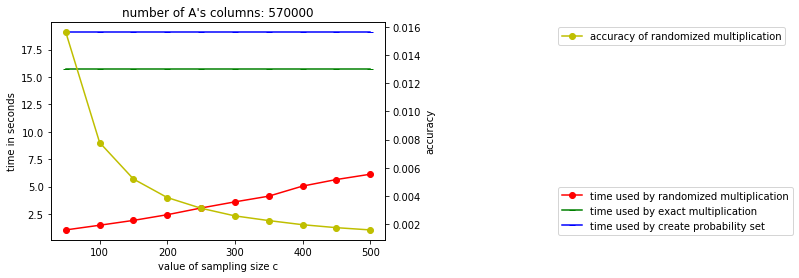

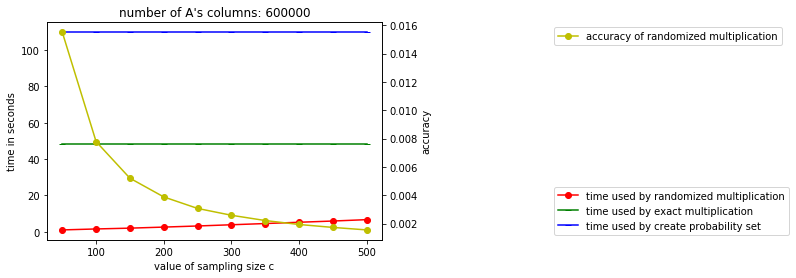

In [222]:
#plot the result for randomized matrix multiplication
for i in range(20):
    size=str(init_n+i*30000)
    title = "number of A's columns: "+size
    fig,ax = plt.subplots()
    ax.plot(C,rmm_timeT[i],color="r", marker="o",label="time used by randomized multiplication")
    emm_timePlot = np.zeros(len(C))+emm_timeT[i]
    ax.plot(C,emm_timePlot,color="g", marker="_",label="time used by exact multiplication")
    p_timePlot = np.zeros(len(C))+p_timeT[i]
    ax.plot(C,p_timePlot,color="b", marker="_",label="time used by create probability set")
    ax.set_xlabel("value of sampling size c")
    ax.set_ylabel("time in seconds")
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower left")
    
    ax2=ax.twinx()
    ax2.plot(C,rmm_accuT[i],color="y", marker="o",label="accuracy of randomized multiplication")
    ax2.set_ylabel("accuracy")
    
    plt.legend(bbox_to_anchor=(1.5,1.0), loc="upper left")
    plt.title(title)
    plt.show()

# Low rank matrix approximation

In [115]:
#Calculate a Hadamard Transformation 
def hadamardM(H,n,index):
    if index==n:
        return H
    if index==1:
        H[0,0]=1
        H[0,1]=1
        H[1,0]=1
        H[1,1]=-1
    else:
        H[0:index,index:index+index]=H[0:index,0:index]
        H[index:index+index,0:index]=H[0:index,0:index]
        H[index:index+index,index:index+index]=H[0:index,0:index]*(-1)
    index=2*index
    return hadamardM(H,n,index)

In [116]:
#Calculate low rank matrix approximation
def low_rank_matrix(A,k):
    #calculating c with c0=0.005 and e=0.25
    n=A.shape[1]
    co=0.005
    c=int(co*k*math.log(n)*(math.log(k/0.0625)+math.log(math.log(n)))/0.0625)+2
    H=hadamard(n)/math.sqrt(n)
    C=range(n)
    chosen=np.random.choice(C,size=c)
    D=np.zeros([n,n])
    for i in range(n):
        D[i,i]=np.random.choice([1,-1])
    #AD=np.matmul(A,D)
    H_sample=np.zeros([A.shape[0],c])
    for i in range(c):
        H_sample[:,i]=H[:,chosen[i]]
    approx = np.matmul(A, np.matmul(D,H_sample))
    Q=linalg.orth(approx)
    B=np.matmul(np.matrix.transpose(Q),A)
    leftB=np.linalg.svd(B)[0][:,0:k]
    approximation=np.matmul(Q,leftB)
    return approximation

In [117]:
#calculate how sparse is A
def sparcity(A):
    return np.count_nonzero(A)/(A.shape[0]*A.shape[1])

In [124]:
#create lists to store results
size_c = 5
rlrma_time_size=[None]*size_c #for randomized low rank matrix approximation
rlrma_accu_size=[None]*size_c
svd_time_size=[None]*size_c #for svd
svd_accu_size=[None]*size_c
A_norm=np.zeros(size_c) #for A's norm
A_sparcity=np.zeros(size_c)

#initialize some constants
K=np.arange(5,51,5)
init_n_app = 512
size = init_n_app
repeatTime = 15

In [125]:
#create lists to store results
rlrma_time_sps=[None]*size_c #for randomized low rank matrix approximation
rlrma_accu_sps=[None]*size_c
svd_time_sps=[None]*size_c #for svd
svd_accu_sps=[None]*size_c
A_norm_sps=np.zeros(size_c) #for A's norm
A_sparcity_sps=np.zeros(size_c)

#initialize some constants
size_sps = 4096

In [126]:
#test the algorithm for different size of A but similar sparcity.
for i in range(size_c):
    #create random matrix A and record it's norm and sparcity
    A = np.random.rand(size,size)
    A_norm[i]=np.linalg.norm(A)
    A_sparcity[i]=sparcity(A)
    #create list to store result for different k but same A
    timeRA=np.zeros(len(K))
    accuRA = np.zeros(len(K))
    timeEA=np.zeros(len(K))
    accuEA = np.zeros(len(K))
    
    index=0
    #test for different k values
    for kn in K:
        #for low rank approximation
        timeR=np.zeros(repeatTime)
        accuR=np.zeros(repeatTime)
        
        start=time.time()
        u,s,vt=svds(A,k=kn)
        end=time.time()
        timeEA[index] = end-start
        accuEA[index] = abs(np.linalg.norm(np.matmul(np.matmul(u,np.matrix.transpose(u)),A))-A_norm[i])
        
        #repeat random method for several times
        for j in range(repeatTime):
            start=time.time()
            resultR=low_rank_matrix(A,kn)
            end=time.time()
            timeR[j]=end-start
            accR=abs(np.linalg.norm(np.matmul(np.matmul(resultR,np.matrix.transpose(resultR)),A))-A_norm[i])
            accuR[j]=accR
        timeRA[index] = np.average(timeR)
        accuRA[index] = np.average(accuR)
        index+=1
        
    rlrma_time_size[i] = timeRA
    print(timeRA)
    rlrma_accu_size[i] = accuRA
    svd_time_size[i] = timeEA
    print(timeEA)
    svd_accu_size[i] = accuEA
    size = size*2


[0.03457023 0.05899908 0.04400646 0.04799468 0.05028089 0.05454906
 0.06313732 0.06927455 0.07631362 0.08338923]
[0.05694318 0.04154015 0.04442382 0.07854009 0.09172082 0.04697394
 0.04941607 0.05840492 0.06612492 0.07995796]
[0.10110799 0.13773562 0.17062922 0.20227076 0.24142297 0.27354943
 0.28540061 0.28567897 0.30312726 0.33741186]
[0.27057195 0.23535204 0.26869607 0.29616618 0.32420111 0.32424331
 0.3788619  0.40644813 0.43024087 0.45056415]
[0.37664946 0.53321792 0.68782825 0.84603413 1.0230951  1.06373994
 1.0487813  1.04265089 1.13721835 1.20740197]
[1.14019299 1.21831703 1.44861484 1.28325987 1.47444582 1.66918302
 1.7987361  1.92874789 2.00186706 2.05354214]
[1.6027857  2.23249639 2.94931959 3.78930128 3.77456614 3.86441253
 4.09273847 4.36982155 4.68454701 4.88366299]
[6.02596593 6.41597295 6.59312391 6.689852   7.46846986 7.82608294
 8.4608469  9.31027913 9.39847612 9.95330286]
[ 6.83180291  9.78856341 12.89541143 16.08414399 17.13604843 17.43414896
 18.15876252 18.4771575

In [127]:
#test the algorithm for same size of A but different sparcity.
for i in range(size_c):
    #create random matrix A and record it's norm and sparcity
    ds = (i+1)/size_c
    A = spr(size_sps,size_sps,density=ds).A
    A_norm_sps[i]=np.linalg.norm(A)
    A_sparcity_sps[i]=ds
    #create list to store result for different k but same A
    timeRA=np.zeros(len(K))
    accuRA = np.zeros(len(K))
    timeEA=np.zeros(len(K))
    accuEA = np.zeros(len(K))
    
    index=0
    #test for different k values
    for kn in K:
        #for low rank approximation
        timeR=np.zeros(repeatTime)
        accuR=np.zeros(repeatTime)
        
        start=time.time()
        u,s,vt=svds(A,k=kn)
        end=time.time()
        timeEA[index] = end-start
        accuEA[index] = abs(np.linalg.norm(np.matmul(np.matmul(u,np.matrix.transpose(u)),A))-A_norm[i])
        
        #repeat random method for several times
        for j in range(repeatTime):
            start=time.time()
            resultR=low_rank_matrix(A,kn)
            end=time.time()
            timeR[j]=end-start
            accR=abs(np.linalg.norm(np.matmul(np.matmul(resultR,np.matrix.transpose(resultR)),A))-A_norm[i])
            accuR[j]=accR
        timeRA[index] = np.average(timeR)
        accuRA[index] = np.average(accuR)
        index+=1
        
    rlrma_time_sps[i] = timeRA
    rlrma_accu_sps[i] = accuRA
    svd_time_sps[i] = timeEA
    svd_accu_sps[i] = accuEA


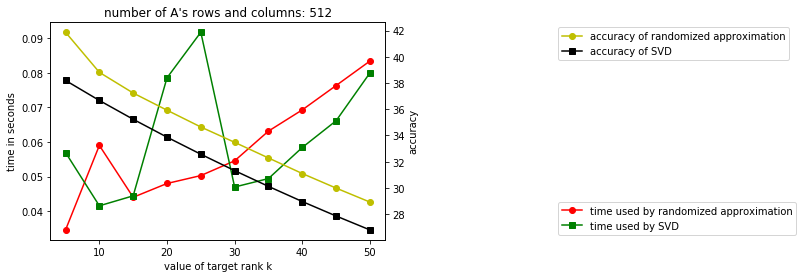

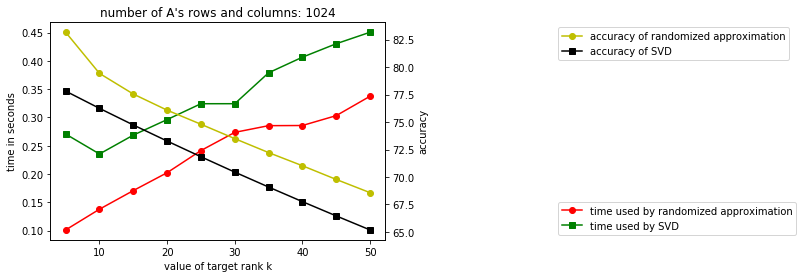

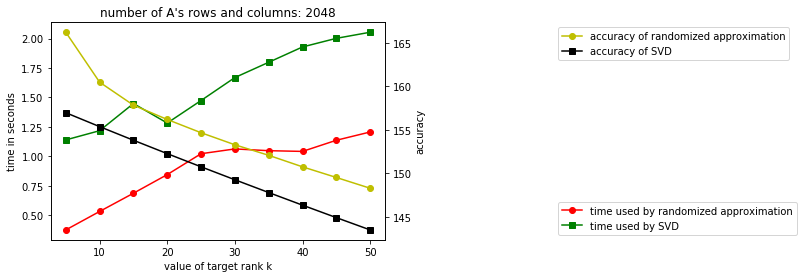

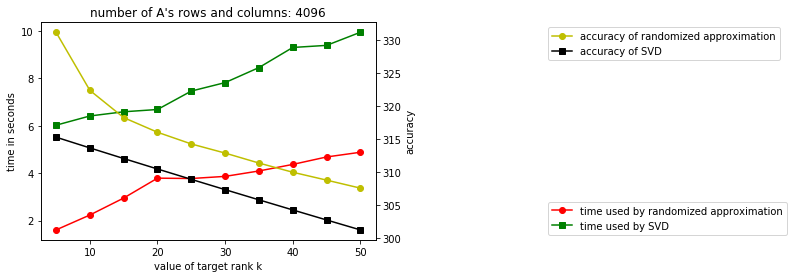

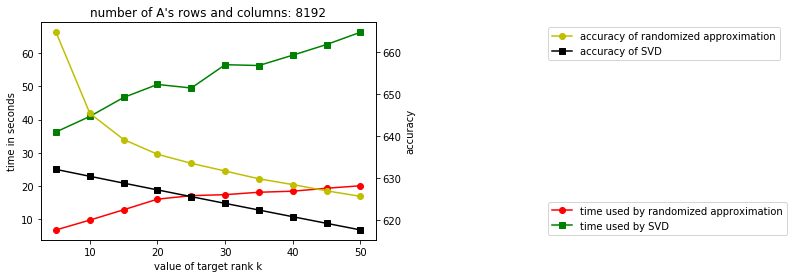

In [206]:
#plot result for randomized low rank matrix multiplication with different size
size_plot = init_n_app
for i in range(size_c):
    size=str(size_plot)
    title = "number of A's rows and columns: "+size
    fig,ax = plt.subplots()
    ax.plot(K,rlrma_time_size[i],color="r", marker="o",label="time used by randomized approximation")
    ax.plot(K,svd_time_size[i],color="g", marker="s",label="time used by SVD")
    ax.set_xlabel("value of target rank k")
    ax.set_ylabel("time in seconds")
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower left")
    
    ax2=ax.twinx()
    ax2.plot(K,rlrma_accu_size[i],color="y", marker="o",label="accuracy of randomized approximation")
    ax2.plot(K,svd_accu_size[i],color="k", marker="s",label="accuracy of SVD")
    ax2.set_ylabel("accuracy")
    
    plt.legend(bbox_to_anchor=(1.5,1.0), loc="upper left")
    plt.title(title)
    plt.show()
    size_plot = size_plot*2

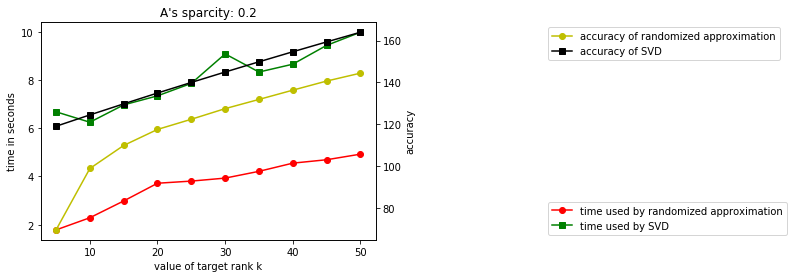

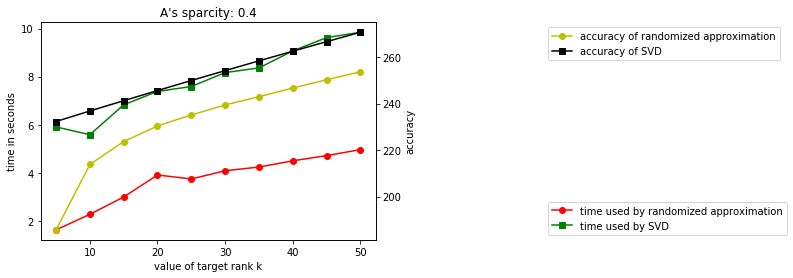

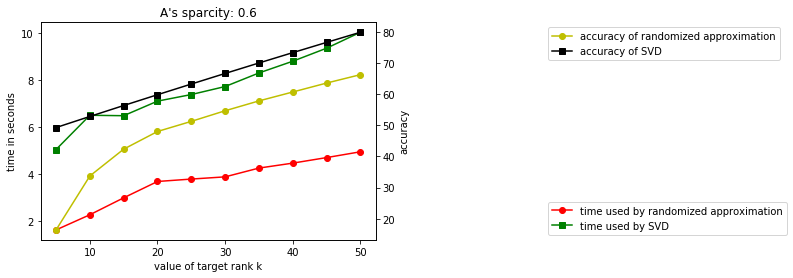

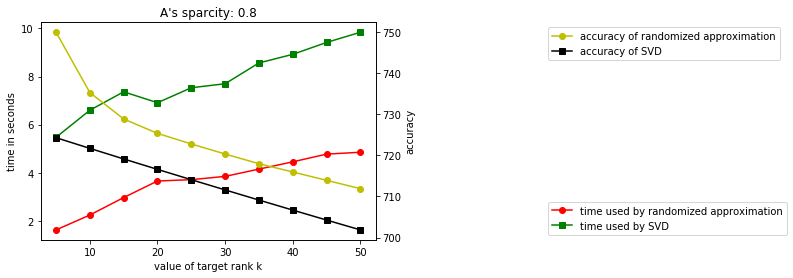

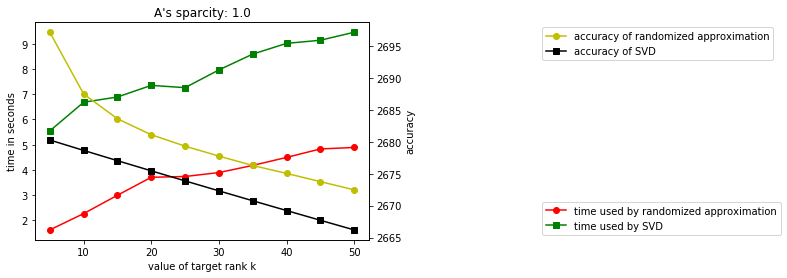

In [207]:
#plot result for randomized low rank matrix multiplication with different sparcity
for i in range(size_c):
    ds = (i+1)/size_c
    spct=str(ds)
    title = "A's sparcity: "+spct
    fig,ax = plt.subplots()
    ax.plot(K,rlrma_time_sps[i],color="r", marker="o",label="time used by randomized approximation")
    ax.plot(K,svd_time_sps[i],color="g", marker="s",label="time used by SVD")
    ax.set_xlabel("value of target rank k")
    ax.set_ylabel("time in seconds")
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower left")
    
    ax2=ax.twinx()
    ax2.plot(K,rlrma_accu_sps[i],color="y", marker="o",label="accuracy of randomized approximation")
    ax2.plot(K,svd_accu_sps[i],color="k", marker="s",label="accuracy of SVD")
    ax2.set_ylabel("accuracy")
    
    plt.legend(bbox_to_anchor=(1.5,1.0), loc="upper left")
    plt.title(title)
    plt.show()

# Low Rank Approximation for PSD

In [135]:
from numpy.linalg import matrix_rank
from numpy.linalg import inv
from scipy.linalg import eigh
from numpy import fft
from numpy.linalg import pinv


In [136]:
#low rank approximation for SPSD with sketches
#get matrix coherence
def get_u(A):
    k = matrix_rank(A)
    projection = np.matmul(np.matmul(A,inv(np.matmul(A.transpose(),A))),A.transpose())
    max = projection[0,0]
    for i in range(projection.shape[0]):
        if projection[i,i]>max:
            max = projection[i,i]
    n = A.shape[0]
    u = n/k*max
    return u
    
#get sampling size for Nystrom
def get_l_ny(u,k,epslon,delta,inc):
    min_l = 2*u*(1/(epslon*epslon))*k*math.log(k/delta)
    return math.ceil(min_l + inc)

#get sampling size for Gaussian
def get_l_gs(k,epslon):
    return math.ceil((1+epslon*epslon)*k)
    
#create sampling matrix for Nystrom extension
def nystrom(n,l):
    I = np.identity(n)
    #print(n)
    #print(l)
    choice = np.random.choice(n, size=l, replace=False)
    S = I[:,choice]
    return S

#create sampling matrix for Gaussian extension
def gaussian(n,l):
    return np.random.normal(size=(n,l))

#run approximation
def approximation(A,l,extension):
    if extension == 0:
        S = nystrom(A.shape[0],l)
    elif extension == 1:
        S = srft(A.shape[0],l)
    elif extension == 2:
        S = gaussian(A.shape[0],l)
    C = np.matmul(A,S)
    W = np.matmul(S.transpose(),np.matmul(A,S))
    Winv = pinv(W)
    approx = np.matmul(C,np.matmul(Winv,C.transpose()))
    return approx

In [156]:
#create lists to store results
size_ct = 7
ny_time_size=[None]*size_ct #for nystrom extension
ny_accu_size=[None]*size_ct
gs_time_size=[None]*size_ct #for gaussian extension
gs_accu_size=[None]*size_ct
esvd_time_size=[None]*size_ct #for svd
esvd_accu_size=[None]*size_ct
psd_norm=np.zeros(size_ct) #for A's norm
psd_sparcity=np.zeros(size_ct)

#initialize some constants
K=np.arange(5,51,5)
init_n_app = 2000
size = init_n_app
repeatTime = 10
epslon = 0.9
delta = 0.1

In [163]:
#test the algorithm for different size of A but similar sparcity.
for i in range(size_ct):
    #create random matrix A and record it's norm and sparcity
    size = init_n_app+i*1000
    A = np.random.rand(size,size)
    A = np.matmul(A.transpose(),A)
    psd_norm[i]=np.linalg.norm(A)
    psd_sparcity[i]=sparcity(A)
    #create list to store result for different k but same A
    timeNA=np.zeros(len(K))
    accuNA=np.zeros(len(K))
    timeGA=np.zeros(len(K))
    accuGA=np.zeros(len(K))
    timeEA=np.zeros(len(K))
    accuEA=np.zeros(len(K))
    #get coherence u
    inputU = get_u(A)
    
    index=0
    #test for different k values
    for kn in K:
        timeN=np.zeros(repeatTime)
        accuN=np.zeros(repeatTime)
        timeG=np.zeros(repeatTime)
        accuG=np.zeros(repeatTime)
        
        
        #for svd
        start=time.time()
        u,s,vt=svds(A,k=kn)
        end=time.time()
        timeEA[index] = end-start
        accuEA[index] = abs(np.linalg.norm(np.matmul(np.matmul(u,np.matrix.transpose(u)),A))-psd_norm[i])
        
        
        
        #repeat nystrom extension for several times
        l=get_l_ny(inputU,kn,epslon,delta,0)
        print("ny:  ",l)
        for j in range(repeatTime):
            start=time.time()
            resultR=approximation(A,l,0)
            end=time.time()
            timeN[j]=end-start
            accR=abs(np.linalg.norm(resultR)-psd_norm[i])
            accuN[j]=accR
        timeNA[index] = np.average(timeN)
        accuNA[index] = np.average(accuN)
        
        #repeat guassian extension for several times
        l=get_l_gs(kn,epslon)
        print("gs:  ",l)
        for j in range(repeatTime):
            start=time.time()
            resultR=approximation(A,l,2)
            end=time.time()
            timeG[j]=end-start
            accR=abs(np.linalg.norm(resultR)-psd_norm[i])
            accuG[j]=accR
        timeGA[index] = np.average(timeG)
        accuGA[index] = np.average(accuG)
        
        index+=1
        
    ny_time_size[i] = timeNA
    ny_accu_size[i] = accuNA
    gs_time_size[i] = timeGA
    gs_accu_size[i] = accuGA
    esvd_time_size[i] = timeEA
    esvd_accu_size[i] = accuEA


ny:   49
gs:   10
ny:   115
gs:   19
ny:   187
gs:   28
ny:   263
gs:   37
ny:   343
gs:   46
ny:   425
gs:   55
[0.13984497 0.23019464 0.2524698  0.46157472 0.50496194 0.68923197]
[0.087328   0.11931291 0.08931139 0.09838281 0.10558391 0.11706512]
[2.07266998 2.35358095 2.43203926 3.00338888 2.55007195 3.07142711]
ny:   50
gs:   10
ny:   116
gs:   19
ny:   189
gs:   28
ny:   267
gs:   37
ny:   348
gs:   46
ny:   431
gs:   55
[0.18992476 0.20510077 0.33153341 0.33809586 0.435656   0.57960956]
[0.11893718 0.09082084 0.10804198 0.09705601 0.1038291  0.1142823 ]
[1.68261933 2.41987395 2.30344486 2.51653099 2.40967607 2.62032819]


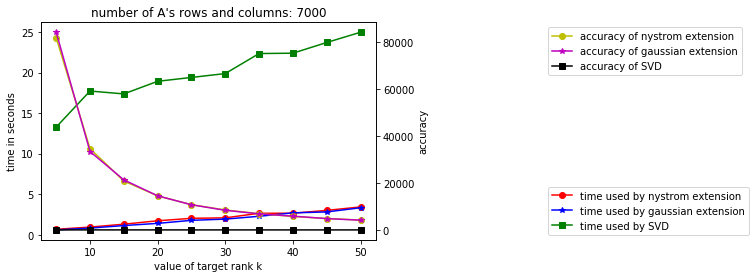

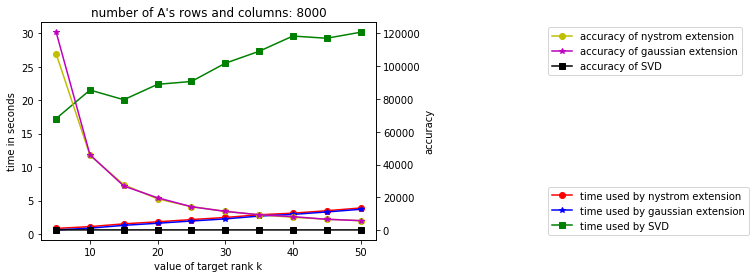

In [312]:
#plot result for randomized low rank PSD matrix multiplication with different size
init_n_app=2000
size_plot = init_n_app
for i in range(5,7,1):
    size_plot=init_n_app+i*1000
    size=str(size_plot)
    title = "number of A's rows and columns: "+size
    fig,ax = plt.subplots()
    ax.plot(K,ny_time_sizeT[i],color="r", marker="o",label="time used by nystrom extension")
    ax.plot(K,gs_time_sizeT[i],color="b", marker="*",label="time used by gaussian extension")
    ax.plot(K,esvd_time_sizeT[i],color="g", marker="s",label="time used by SVD")
    ax.set_xlabel("value of target rank k")
    ax.set_ylabel("time in seconds")
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower left")
    
    ax2=ax.twinx()
    ax2.plot(K,ny_accu_sizeT[i],color="y", marker="o",label="accuracy of nystrom extension")
    ax2.plot(K,gs_accu_sizeT[i],color="m", marker="*",label="accuracy of gaussian extension")
    ax2.plot(K,esvd_accu_sizeT[i],color="k", marker="s",label="accuracy of SVD")
    ax2.set_ylabel("accuracy")
    
    plt.legend(bbox_to_anchor=(1.5,1.0), loc="upper left")
    plt.title(title)
    plt.show()

In [313]:
#create lists to store results
size_ct = 7
ny_time_sps=[None]*size_ct #for nystrom extension
ny_accu_sps=[None]*size_ct
gs_time_sps=[None]*size_ct #for gaussian extension
gs_accu_sps=[None]*size_ct
esvd_time_sps=[None]*size_ct #for svd
esvd_accu_sps=[None]*size_ct
psd_norm_sps=np.zeros(size_ct) #for A's norm
psd_sparcity_sps=np.zeros(size_ct)

#initialize some constants
K=np.arange(5,51,5)
size = 2000
repeatTime = 10
epslon = 0.9
delta = 0.1

In [315]:
#test the algorithm for same size of A but different sparcity.
count=0
for i in range(size_ct):
    #create random matrix A and record it's norm and sparcity
    ds = (i+1)/int(size_ct+1)
    A = spr(3000,3000,density=ds).A
    A = np.matmul(A.transpose(),A)
    psd_norm_sps[i]=np.linalg.norm(A)
    psd_sparcity_sps[i]=sparcity(A)
    #create list to store result for different k but same A
    timeNA=np.zeros(len(K))
    accuNA=np.zeros(len(K))
    timeGA=np.zeros(len(K))
    accuGA=np.zeros(len(K))
    timeEA=np.zeros(len(K))
    accuEA=np.zeros(len(K))
    #get coherence u
    inputU = get_u(A)
    
    index=0
    #test for different k values
    for kn in K:
        print(count)
        count+=1
        timeN=np.zeros(repeatTime)
        accuN=np.zeros(repeatTime)
        timeG=np.zeros(repeatTime)
        accuG=np.zeros(repeatTime)
        
        
        #for svd
        start=time.time()
        u,s,vt=svds(A,k=kn)
        end=time.time()
        timeEA[index] = end-start
        accuEA[index] = abs(np.linalg.norm(np.matmul(np.matmul(u,np.matrix.transpose(u)),A))-psd_norm_sps[i])
        
        
        
        #repeat nystrom extension for several times
        l=get_l_ny(inputU,kn,epslon,delta,0)
        #print("ny:  ",l)
        for j in range(repeatTime):
            start=time.time()
            resultR=approximation(A,l,0)
            end=time.time()
            timeN[j]=end-start
            accR=abs(np.linalg.norm(resultR)-psd_norm_sps[i])
            accuN[j]=accR
        timeNA[index] = np.average(timeN)
        accuNA[index] = np.average(accuN)
        
        #repeat guassian extension for several times
        #l=get_l_gs(kn,epslon)
        #print("gs:  ",l)
        for j in range(repeatTime):
            start=time.time()
            resultR=approximation(A,l,2)
            end=time.time()
            timeG[j]=end-start
            accR=abs(np.linalg.norm(resultR)-psd_norm_sps[i])
            accuG[j]=accR
        timeGA[index] = np.average(timeG)
        accuGA[index] = np.average(accuG)
        
        index+=1
        
    ny_time_sps[i] = timeNA
    ny_accu_sps[i] = accuNA
    gs_time_sps[i] = timeGA
    gs_accu_sps[i] = accuGA
    esvd_time_sps[i] = timeEA
    esvd_accu_sps[i] = accuEA


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


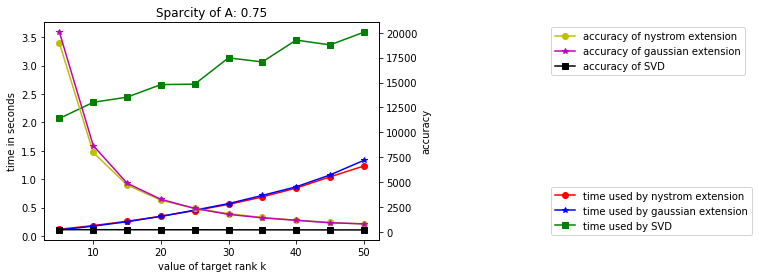

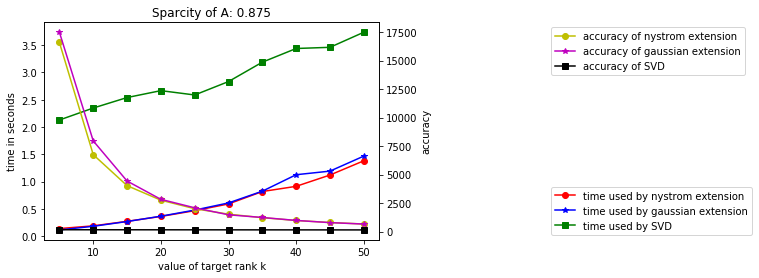

In [319]:
#plot result for randomized low rank PSD matrix multiplication with different sparcity
for i in range(5,7,1):
    ds = (i+1)/int(size_ct+1)
    size=str(ds)
    title = "Sparcity of A: "+size
    fig,ax = plt.subplots()
    ax.plot(K,ny_time_sps[i],color="r", marker="o",label="time used by nystrom extension")
    ax.plot(K,gs_time_sps[i],color="b", marker="*",label="time used by gaussian extension")
    ax.plot(K,esvd_time_sps[i],color="g", marker="s",label="time used by SVD")
    ax.set_xlabel("value of target rank k")
    ax.set_ylabel("time in seconds")
    plt.legend(bbox_to_anchor=(1.5,0), loc="lower left")
    
    ax2=ax.twinx()
    ax2.plot(K,ny_accu_sps[i],color="y", marker="o",label="accuracy of nystrom extension")
    ax2.plot(K,gs_accu_sps[i],color="m", marker="*",label="accuracy of gaussian extension")
    ax2.plot(K,esvd_accu_sps[i],color="k", marker="s",label="accuracy of SVD")
    ax2.set_ylabel("accuracy")
    
    plt.legend(bbox_to_anchor=(1.5,1.0), loc="upper left")
    plt.title(title)
    plt.show()

# SVM

In [17]:
import pandas as pd

In [18]:
#import data with pandas
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [112]:
data.shape

(3168, 21)

In [ ]:
split X and Y
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [21]:
#preprocessing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#encode Y
le = preprocessing.LabelEncoder()
le.fit(["male","female"])
Y = le.transform(Y)

In [26]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [27]:
#standartdize X
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainS = scaler.transform(X_train)
X_testS = scaler.transform(X_test)

In [57]:
#train with model with linear kernel without approximation
from sklearn import svm
svcl = svm.SVC(kernel='linear')
start = time.time()
svcl.fit(X_train,y_train)
end = time.time()
print("time used to fit the model with linear kernel without approximation: ",end-start)

time used to fit the model with linear kernel without approximation:  3.52838397026062


In [113]:
#accuracy score for linear kernel without approximation
from sklearn.metrics import accuracy_score
y_pred = svcl.predict(X_test)
print("accuracy of the model with linear kernel without approximation: ",accuracy_score(y_test, y_pred))

accuracy of the model with linear kernel without approximation:  0.9148264984227129


In [104]:
#calculate gram matrix
train = np.asarray(X_trainS)
gram = np.matmul(train,train.transpose())
gram.shape
k = 10
epslon=0.9

In [105]:
#approximate the gram matrix with the sketch and guassian extension
l=get_l_gs(k,epslon)
start=time.time()
gramapprox = approximation(gram,l,2)
end = time.time()
print("time used to approximate with gaussian extension: ",end-start)

time used to approximate with gaussian extension:  0.1310422420501709


In [106]:
#fit model with linear kernel with approximation
svcl_app_g = svm.SVC(kernel='precomputed')
start = time.time()
svcl_app_g.fit(gramapprox,y_train)
end = time.time()
print("time used to fit the model with linear kernel with gaussian approximation: ",end-start)

time used to fit the model with linear kernel with gaussian approximation:  0.07590723037719727


In [114]:
#accuracy score for linear kernel with gaussian approximation
kernel_test = np.dot(X_testS, X_trainS.T)
y_pred_app = svcl_app.predict(kernel_test)
print("accuracy of the model with linear kernel with gaussian approximation: ",accuracy_score(y_test, y_pred_app))

accuracy of the model with linear kernel with gaussian approximation:  0.9779179810725552


In [99]:
#get the coherence of the gram matrix
u=get_u(gram)

In [116]:
#approximate the gram matrix with the sketch and nystrom extension
#l_n=get_l_ny(u,k,epslon,0.9,0)
start=time.time()
gramapproxn = approximation(gram,2*k,0)
end = time.time()
print("time used to approximate with nystrom extension: ",end-start)

time used to approximate with nystrom extension:  0.21469998359680176


In [109]:
#fit model with linear kernel with approximation
svcl_app_n = svm.SVC(kernel='precomputed')
start = time.time()
svcl_app_n.fit(gramapproxn,y_train)
end = time.time()
print("time used to fit the model with linear kernel with gaussian approximation: ",end-start)

time used to fit the model with linear kernel with gaussian approximation:  0.08150100708007812


In [117]:
#accuracy score for linear kernel with gaussian approximation
kernel_test = np.dot(X_testS, X_trainS.T)
y_pred_app = svcl_app_n.predict(kernel_test)
print("accuracy of the model with linear kernel with gaussian approximation: ",accuracy_score(y_test, y_pred_app))

accuracy of the model with linear kernel with gaussian approximation:  0.9779179810725552


# Principle Component Analysis

In [ ]:
#calculate pca with A's SVD
def pca_wsvd(A,c):
    u,s,vt=svds(A,k=c)
    print(u.shape)
    PC=vt[0:2,:]
    return np.matmul(PC,A.transpose()).transpose()

In [ ]:
#randomized SVD
def rand_pca(A,c,p):
    omega=np.random.normal(size=(A.shape[1],c+5))
    approx=np.matmul(A,omega)
    Q=linalg.orth(approx)
    for i in range(p):
        G=linalg.orth(np.matmul(A.transpose(),Q))
        Q=linalg.orth(np.matmul(A,G))
    B = np.matmul(Q.transpose(),A)
    u,s,vt=svds(B,k=c)
    u = np.matmul(Q,u)
    sM = np.zeros(c*c).reshape(c,c)
    for i in range(len(s)):
        sM[i,i] = s[i]
    return np.matmul(u,sM)

In [ ]:
#center the data
scaler = preprocessing.StandardScaler(with_std=False).fit(X_train)
X_trainS = scaler.transform(X_train)

In [ ]:
#check runtime for pca with A's svd
start = time.time()
PCX = pca_wsvd(X_trainS,2)
end = time.time()
print(end-start)

In [ ]:
#check the runtime of randomized PCA
start = time.time()
rPCX = rand_pca(X_trainS,2,2)
end = time.time()
print(end-start)

In [ ]:
#compare the two results
print(abs(np.linalg.norm(PCX-rPCX))/np.linalg.norm(PCX))

In [323]:
#to see the time used by generating random matrix
import time
time_r = np.zeros(10)
time_n = np.zeros(10)
for i in range(10):
    size = i*1000
    start=time.time()
    A = np.random.rand(size,size)
    end = time.time()
    time_r[i] = end-start
    start = time.time()
    A = np.random.normal(size,size)
    end = time.time()
    time_n[i] = end-start
    
print(time_r)
print(time_n)

[0.00611186 0.01976109 0.09692907 0.10023022 0.23810101 0.36432409
 0.56263399 0.74041104 0.98058987 1.23248315]
[4.19616699e-05 8.32080841e-04 4.25696373e-03 5.19585609e-03
 1.07860565e-02 1.97598934e-02 2.43499279e-02 3.32989693e-02
 4.88560200e-02 6.28678799e-02]
